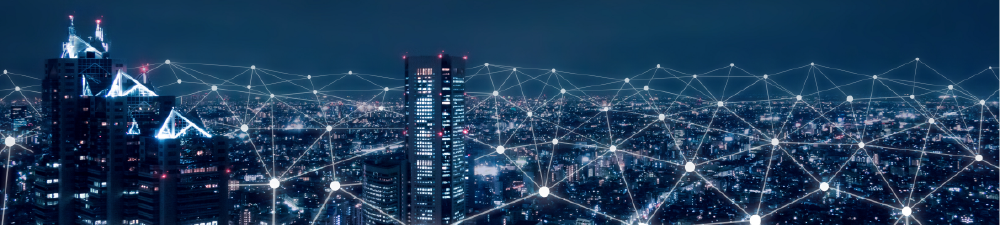

# Mini Project 2 - IU 4.5 Statistical Analysis

## Packages and setup

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [6]:
#Read data using pandas
#paste the url in between quotes
#pd.read_csv("https://raw.githubusercontent.com/MicrosoftLearning/Principles-of-Machine-Learning-Python/master/Module7/Automobile%20price%20data%20_Raw_.csv")

user_df=pd.read_csv("cookie_cats.csv")
df_indexed = user_df.set_index("userid", drop = False)

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
df_indexed.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
df_indexed.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
df_indexed.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


userid  version  sum_gamerounds  retention_1  retention_7
userid                                                           
337        337  gate_30              38         True        False
377        377  gate_40             165         True        False
116        116  gate_30               3        False        False
483        483  gate_40               1        False        False
488        488  gate_40             179         True         True

## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [7]:
#Check for any missing values in the data using isnull() function
x=0
y=0

for x in range(90189):
    for y in range(5):
        if (pd.isnull(df_indexed.iloc[x,y])==True):
#        if (pd.isnull(df_dropoutlier.iloc[x,y])==True):
            print ("Position", x, "and", y, "gives null", "\n")

print("x is", x, "and y is", y)

x is 90188 and y is 4


### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

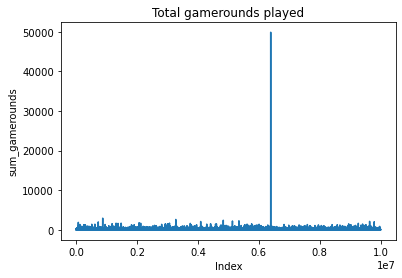

In [8]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(df_indexed.sum_gamerounds)

In [9]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier
#user_df[user_df["sum_gamerounds"] > 10000] , alternative formula

voutlier_index = df_indexed[['sum_gamerounds']].idxmax()
#voutlier_index
#print(df_indexed.loc[voutlier_index])

#Check dimension of data i.e. # of rows and #column before dropping outlier
print("no. of rows and columns before dropping")
df_indexed.shape

df_dropoutlier = df_indexed.drop(voutlier_index, axis=0)

#Check dimension of data i.e. # of rows and #column after dropping outlier
print("no. of rows and columns after dropping")
df_dropoutlier.shape

no. of rows and columns before dropping


(90189, 5)

no. of rows and columns after dropping


(90188, 5)

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

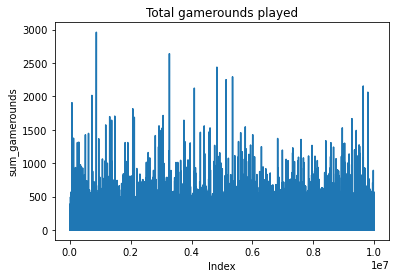

In [6]:
#Plot the graph for sum_gamerounds player after removing the outlier

#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(df_dropoutlier.sum_gamerounds)


In [ ]:
# Plot the boxplot as well, currently code is NOT CORRECT, find out how to do
#plt.figure(figsize = (6, 6))
#plt.title("Total Gamerounds Played After Removing of Outliers")
#sns.boxplot(data = df_dropoutlier["sum_gamerounds"], orient = "v");

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [10]:
#Check dimension of data i.e. # of rows and #column after dropping outlier
#print("no. of rows and columns after dropping")
#Solution's author here: https://www.linkedin.com/in/violat/
#df_dropoutlier.shape

#Insert calculation for 7-day retention rate

retention_rate_7=df_dropoutlier['retention_7'].values.sum()
#alternative way of calling: df_dropoutlier.shape[0]
num_rows = df_dropoutlier.count()[0]
retention_rate_7 = retention_rate_7/num_rows * 100

print("Overall 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overall 7 days retention rate of the game for both versions is:  18.60557945624695 %


### Q2.2 How many players never played the game after installing? 

In [11]:
# Find number of customers with sum_gamerounds is equal to zero
i = 0
vneverplay = 0

#for i in range(num_rows)
for i in range(num_rows):
    if (df_dropoutlier.iloc[i]["sum_gamerounds"] == 0):
        vneverplay = vneverplay + 1
#        df_dropoutlier.iloc[i]        
#        print (vneverplay, "gamerounds is 0")
#    else:
#        df_dropoutlier.iloc[i] 
#        print ("gamerounds is not 1")

print (vneverplay, "players never played the game after installing.")

3994 players never played the game after installing.


### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

84966 play 200 gamerounds and less.


Text(0.5, 1.0, 'Player Count as Level Progresses')

Text(0.5, 0, 'Games Played')

Text(0, 0.5, 'Player Count')

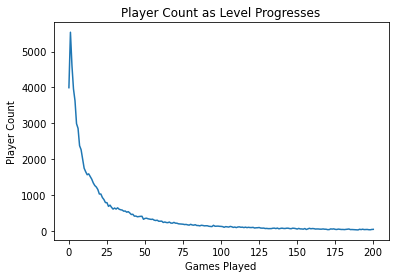

In [12]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds, 84966
#Jason's solution in comment here:
#Use plot() function on the summarized stats to visualize the chart
#Solution's author here: https://www.linkedin.com/in/violat/
#norm_df_200 = norm_df[(norm_df["sum_gamerounds"] >= 1) & (norm_df["sum_gamerounds"] <= 200)]
#norm_df_200 = norm_df_200.groupby("sum_gamerounds")["userid"].count()

#plt.plot(norm_df_200)
#plt.title("Player Count as Level Progresses")
#plt.xlabel("Games Played")
#plt.ylabel("Player Count")
#plt.show()


i = 0
a = 0
vless200users = 0
less200array = np.zeros(201)

less200array[0] = vneverplay

for i in range(num_rows):
    if ((df_dropoutlier.iloc[i]["sum_gamerounds"] < 201) and (df_dropoutlier.iloc[i]["sum_gamerounds"]> 0)):
        vless200users = vless200users + 1
        a = df_dropoutlier.iloc[i]["sum_gamerounds"]
        less200array[a] = less200array[a] + 1

vless200users = vless200users+vneverplay
print (vless200users, "play 200 gamerounds and less.")

plt.plot (less200array)
plt.title("Player Count as Level Progresses")
plt.xlabel("Games Played")
plt.ylabel("Player Count")
plt.show()

#less200array
#vless200users

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [13]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(df_dropoutlier.version, df_dropoutlier.retention_1).apply(lambda r: r/r.sum(), axis=1)

pd.crosstab(df_dropoutlier.version, df_dropoutlier.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_1     False     True 
version                        
gate_30      0.551802  0.448198
gate_40      0.557717  0.442283

retention_7     False     True 
version                        
gate_30      0.809817  0.190183
gate_40      0.818000  0.182000

<mark>__Analsysis Results:__
    
The percentage of customers retained both for after 1 day and after 7 days are close to each other for both game versions.   

### Q3.2 Gamerounds summary for different game versions

In [14]:
#Solution's author here: https://www.linkedin.com/in/violat/
#use pandas group by to calculate average game rounds played summarized by different versions

df_dropoutlier.groupby("version")["sum_gamerounds"].describe()

count       mean         std  min  25%   50%   75%     max
version                                                              
gate_30  44699.0  51.342111  102.057598  0.0  5.0  17.0  50.0  2961.0
gate_40  45489.0  51.298776  103.294416  0.0  5.0  16.0  52.0  2640.0

<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 
    <br><b>Total mean gamerounds do not differ much based on different versions of the game.  The most aggresive player at gate30 though plays more than 300 more rounds of game than the most aggressive player at gate40.  The standard deviation for both is high (more than 102, double the means) which suggests that there are other independent (outside of position of gates) factors encouraging the top 25% players (by gamerounds) to play way beyond the mean number of about 51 rounds.</b>
    
    Delaying the gate to level 40 does not increase the percentage of players who are retained after 7 days or to increase the mean game rounds to achieve business impact.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [15]:
#Code by teammate
#Define A/B groups for hypothesis testing
df_dropoutlier["version"] = np.where(df_dropoutlier["version"] == "gate_30", "A", "B")
df_dropoutlier.head()

# Define A/B groups for hypothesis testing
group_A = pd.DataFrame(df_dropoutlier[df_dropoutlier["version"] == "A"]["sum_gamerounds"])
group_B = pd.DataFrame(df_dropoutlier[df_dropoutlier["version"] == "B"]["sum_gamerounds"])
display(group_A.head(), group_B.head())

userid version  sum_gamerounds  retention_1  retention_7
userid                                                          
337        337       A              38         True        False
377        377       B             165         True        False
116        116       A               3        False        False
483        483       B               1        False        False
488        488       B             179         True         True

sum_gamerounds
userid                
337                 38
116                  3
1066                 0
2101                 0
2179                39

sum_gamerounds
userid                
377                165
483                  1
488                179
540                187
1444                 2

### Q4.1 Shapiro test of Normality

In [16]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    
# Teammate's code

# Test for group_A
stat, p = shapiro(group_A)  # Shapiro returns 2 value
print(f"Shapiro Test - group_A: Statistic = {stat}, p-value = {p}")


#test for group_B
stat, p = shapiro(group_B)
print(f"Shapiro Test - group_B: Statistic = {stat}, p-value = {p}")

Shapiro Test - group_A: Statistic = 0.48864424228668213, p-value = 0.0
Shapiro Test - group_B: Statistic = 0.4825654625892639, p-value = 0.0


<mark>__Analsysis Results:__
    
__Type your answer here:__ Based on the result of <u>**Shapiro test**</u>, the null hypothesis is rejected (p < 0.05), indicating that the distribution for both groups are not normal.

### Q4.2 Test of homegienity of variance

In [17]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances
# Teammate's code

#perform levene's test and accept or reject the null hypothesis based on the results
stat, p = stats.levene(group_A["sum_gamerounds"], group_B["sum_gamerounds"])

print(f"Levene Test: Statistic = {stat}, p-value = {p}")



Levene Test: Statistic = 0.07510153837481241, p-value = 0.7840494387892463


<mark>__Analsysis Results:__
    
__Type your answer here:__ Based on the result of the <u>**Levene's test**</u>, the variances between the two groups are equal (p > 0.05).

### Q4.3 Test of significance: Two sample test

In [18]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different
#Test at 0.05 significance level, 2 tailed means at 0.025 of each level
#Solution's author here: https://www.linkedin.com/in/violat/

#Apply relevant two sample test to accept or reject the NULL hypothesis

stats.mannwhitneyu(group_A.sum_gamerounds,group_B.sum_gamerounds)
#sample()

##Alternative method of two sample hypothesis test

#import random

#def myboot(sum_gamerounds):
#    resample = random.choices(clean_df,k=len(sum_gamerounds))
#   m = statistics.mean(resample)

#bootmean = []
#for i in range(1000):
#    x = myboot(clean_df)
#    mymean.append(x)
    
#plt.hist(mymean)
#plt.show()
# to test for whether the distributions are normal

MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Since p value is greater than our significance level of 0.05 for 2-tailed test (0.025 per side), we fail to reject the null hypothesis thus the two samples are equal.  Thus there is no need to shift the gate to level 40.

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [16]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories
#Not using groupby function explicitly but the output is already grouped according to True or False

pd.crosstab(df_dropoutlier.version, df_dropoutlier.retention_1).apply(lambda r: r/r.sum(), axis=1)

pd.crosstab(df_dropoutlier.version, df_dropoutlier.retention_7).apply(lambda r: r/r.sum(), axis=1)


retention_1     False     True 
version                        
A            0.551802  0.448198
B            0.557717  0.442283

retention_7     False     True 
version                        
A            0.809817  0.190183
B            0.818000  0.182000

<mark>__Analsysis Results:__
    
__Type your answer here:__ Gate 30 has slightly better retention rate of customers both for 1 day after and 7 days after. 

In [19]:
#code inspired by teammate, Soh Kiam Boon
#Solution's author here: https://www.linkedin.com/in/violat/

# Specified the bins range, cut by approximate quartile range
bins = [0, 6, 17, 30, 31, 40, 41, 52, 2962]

# Use pd.cut() to separate the array elements into our specified bin range
binning_A = pd.cut(group_A["sum_gamerounds"], bins = bins)
binning_B = pd.cut(group_B["sum_gamerounds"], bins = bins)

# Groupby and count how many gamerounds by bin range
binned_A = group_A.groupby(binning_A).count()
binned_B = group_B.groupby(binning_B).count()


# Display binned_A
print("binned_A:")
display(binned_A.head(10))

# Display binned_B
print("\n", "binned_B:")
display(binned_B.head(10))

binned_A:


sum_gamerounds
sum_gamerounds                
(0, 6]                   11539
(6, 17]                   9316
(17, 30]                  5550
(30, 31]                   279
(31, 40]                  2791
(40, 41]                   261
(41, 52]                  2222
(52, 2962]               10804


 binned_B:


sum_gamerounds
sum_gamerounds                
(0, 6]                   12045
(6, 17]                   9489
(17, 30]                  5629
(30, 31]                   335
(31, 40]                  2334
(40, 41]                   201
(41, 52]                  2094
(52, 2962]               11305

In [20]:
# Concatenating binned_A & binned_B for side-by-side bars chart
binned_AB = pd.concat({"binned_A": binned_A, "binned_B": binned_B}, axis = 1)
binned_AB.head(10)

binned_A       binned_B
               sum_gamerounds sum_gamerounds
sum_gamerounds                              
(0, 6]                  11539          12045
(6, 17]                  9316           9489
(17, 30]                 5550           5629
(30, 31]                  279            335
(31, 40]                 2791           2334
(40, 41]                  261            201
(41, 52]                 2222           2094
(52, 2962]              10804          11305

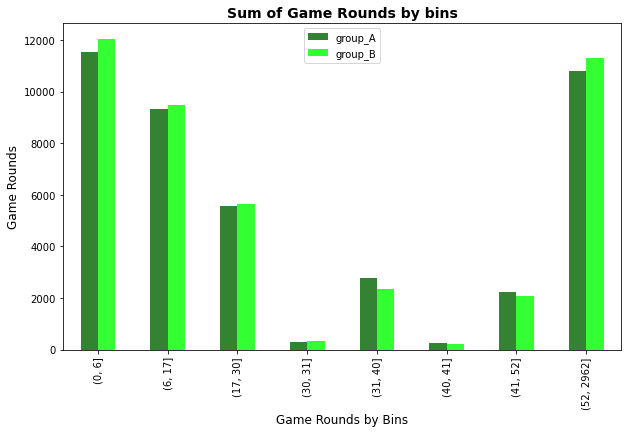

In [21]:
# Visualizing the group_A and group_B by bins
binned_AB.plot(kind = "bar", figsize = (10, 6), color = ["darkgreen", "lime"], alpha = 0.8)
plt.legend(["group_A", "group_B"])
plt.xlabel("Game Rounds by Bins", size = 12)
plt.ylabel("Game Rounds", size = 12)
plt.title("Sum of Game Rounds by bins", size = 14, fontweight = "bold");

<mark>__Analsysis Results:__
    
    Gate 40 has more users playing in the 1st, 2nd and 4th quartile while Gate 30 has more users playing in the 3rd quartile. 
    
__Type your answer here:__ Gate 40 seems to motivate around 400-ish more players to play beyond 52 rounds but also has 1000++ more players stopping before round 17.  Gate 30 however has around 1000-ish more players playing between 17 to 51 rounds.  
    
    Considering also the better retention rates at Day 1 and Day 7 for gate 30, suggest to keep the gate at level 30 and find out: 
    1) the other independent factors that intrinsically motivate the people in the level 40 group to keep playing beyond 52 gamerounds.  
    2) Find ways to monetise customers who are playing between level 17 and 51 and to motivate them to keep playing beyond 52 rounds.

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

In [22]:
#Hint: Plot density function
#Done by Teammate

# Counting how much time does this cell execute
%time

# Hint: Plot density function

# Creating 2 lists with bootstrapped means for gate_30 and gate_40
bootstrap_1 = []
bootstrap_7 = []


for samples in range(1000):  # Use 1000 samples

    # For rentention_1
    bootstrap_mean = df_dropoutlier.sample(frac = 0.7, replace = True).groupby("version")["retention_1"].mean()  # Return all rows in random order
    bootstrap_1.append(bootstrap_mean)

    # For rentention_7
    bootstrap_mean = df_dropoutlier.sample(frac = 0.7, replace = True).groupby("version")["retention_7"].mean()
    bootstrap_7.append(bootstrap_mean)


print(f"bootstrap_1: {bootstrap_1[:5]}")  # Preview 1st 5 items
print("\n")
print(f"bootstrap_7: {bootstrap_7[:5]}")  # Preview 1st 5 items

Wall time: 0 ns
bootstrap_1: [version
A    0.446260
B    0.447189
Name: retention_1, dtype: float64, version
A    0.454366
B    0.442007
Name: retention_1, dtype: float64, version
A    0.449206
B    0.438826
Name: retention_1, dtype: float64, version
A    0.447214
B    0.444233
Name: retention_1, dtype: float64, version
A    0.447532
B    0.444266
Name: retention_1, dtype: float64]


bootstrap_7: [version
A    0.189359
B    0.181918
Name: retention_7, dtype: float64, version
A    0.189451
B    0.178126
Name: retention_7, dtype: float64, version
A    0.192958
B    0.182304
Name: retention_7, dtype: float64, version
A    0.186417
B    0.186515
Name: retention_7, dtype: float64, version
A    0.186155
B    0.184823
Name: retention_7, dtype: float64]


In [23]:
# Converting the bootstrap_7 list to a DataFrame - Easier to plot a chart
bootstrap_1 = pd.DataFrame(bootstrap_1)
bootstrap_7 = pd.DataFrame(bootstrap_7)


print("bootstrap_1:")
display(bootstrap_1.head())

print("\n", "bootstrap_7:")
display(bootstrap_7.head())

bootstrap_1:


version             A         B
retention_1  0.446260  0.447189
retention_1  0.454366  0.442007
retention_1  0.449206  0.438826
retention_1  0.447214  0.444233
retention_1  0.447532  0.444266


 bootstrap_7:


version             A         B
retention_7  0.189359  0.181918
retention_7  0.189451  0.178126
retention_7  0.192958  0.182304
retention_7  0.186417  0.186515
retention_7  0.186155  0.184823

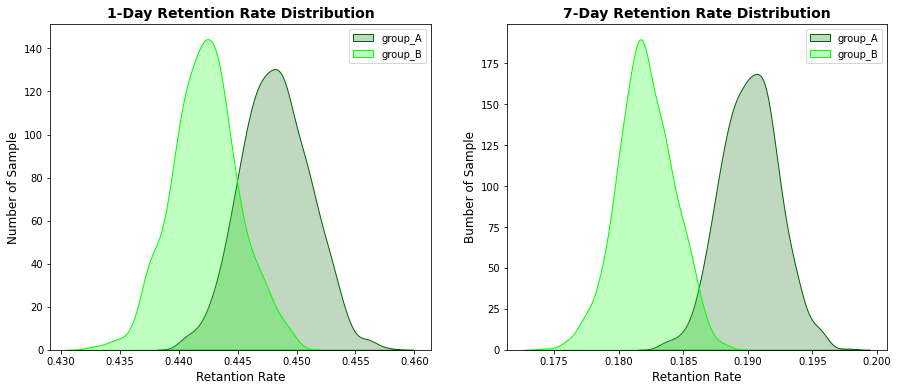

In [24]:
fig = plt.figure(figsize = (15, 6))

ax1 = plt.subplot(121)
sns.kdeplot(ax = ax1, data = bootstrap_1, x = "A", shade = True, color = ["darkgreen"])
sns.kdeplot(ax = ax1, data = bootstrap_1, x = "B", shade = True, color = ["lime"])
ax1.legend(labels = ["group_A", "group_B"])  # "Level 30", "Level 40"
ax1.set_xlabel("Retantion Rate", size = 12)
ax1.set_ylabel("Number of Sample", size = 12)
ax1.set_title("1-Day Retention Rate Distribution", size = 14, fontweight = "bold")

ax2 = plt.subplot(122)
sns.kdeplot(ax = ax2, data = bootstrap_7, x = "A", shade = True, color = ["darkgreen"])
sns.kdeplot(ax = ax2, data = bootstrap_7, x = "B", shade = True, color = ["lime"])
ax2.legend(labels = ["group_A", "group_B"])
ax2.set_xlabel("Retantion Rate", size = 12)
ax2.set_ylabel("Bumber of Sample", size = 12)
ax2.set_title("7-Day Retention Rate Distribution", size = 14, fontweight = "bold");

In [25]:
# Adding a new column for the difference between gate_30 & gate gate_40
bootstrap_1["diff"] = (bootstrap_1["A"] - bootstrap_1["B"]) / bootstrap_1["A"] * 100
bootstrap_7["diff"] = (bootstrap_7["A"] - bootstrap_7["B"]) / bootstrap_7["B"] * 100


print("bootstrap_1:")
display(bootstrap_1.head())

print("\n", "bootstrap_7:")
display(bootstrap_7.head())

bootstrap_1:


version             A         B      diff
retention_1  0.446260  0.447189 -0.208177
retention_1  0.454366  0.442007  2.720053
retention_1  0.449206  0.438826  2.310862
retention_1  0.447214  0.444233  0.666667
retention_1  0.447532  0.444266  0.729778


 bootstrap_7:


version             A         B      diff
retention_7  0.189359  0.181918  4.090390
retention_7  0.189451  0.178126  6.357921
retention_7  0.192958  0.182304  5.844225
retention_7  0.186417  0.186515 -0.052207
retention_7  0.186155  0.184823  0.720767

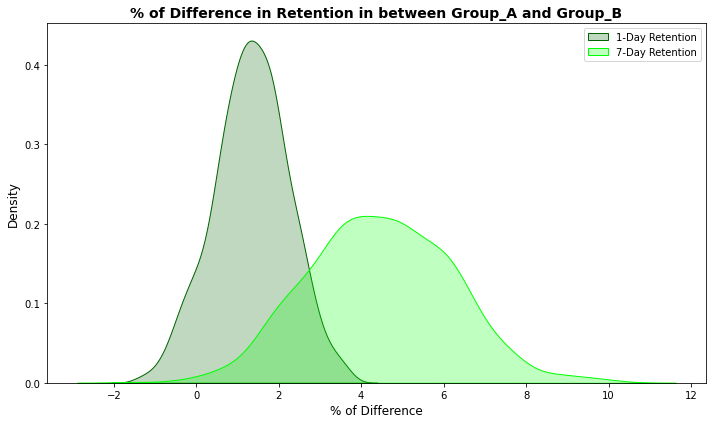

In [26]:
# Ploting the bootstrap difference between gate_30 & gate gate_40 for both retention_1 & retention_7

fig = plt.figure(figsize = (10, 6))

ax1 = plt.subplot()
sns.kdeplot(ax = ax1, data = bootstrap_1, x = "diff", shade = True, label = "1-Day Retention", color = ["darkgreen"])
sns.kdeplot(ax = ax1, data = bootstrap_7, x = "diff", shade = True, label = "7-Day Retention", color = ["lime"])
plt.legend()
ax1.set_xlabel("% of Difference", size = 12)
ax1.set_ylabel("Density", size = 12)
ax1.set_title("% of Difference in Retention in between Group_A and Group_B", size = 14, fontweight = "bold")
plt.tight_layout();


# ax1 = plt.subplot(122)
# ax2.set_xlabel("% of Difference", size = 12)
# ax2.set_ylabel("Density", size = 12)
# ax2.set_title("% of Difference between gate_30 & gate_40 for 7-Day Rentention", size = 14, fontweight = "bold")

In [27]:
# Calculating the probability for 1-Day retention is greater if the gate is at level 30
prob1 = (bootstrap_1["diff"] > 0).sum() / len(bootstrap_7)
print("retention_1:")
f"{prob1:.2%}"

# Calculating the probability for 7-day retention is greater if the gate is at level 30
prob7 = (bootstrap_7["diff"] > 0).sum() / len(bootstrap_7)
print("\n\n", "retention_7:")
f"{prob7:.2%}"

retention_1:


'91.60%'



 retention_7:


'99.60%'

The bootstrap differences result tells us that there is strong evidence that 7-day retention is higher when the gate is at level 30 than when it is at level 40. The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we SHOULD NOT move the gate from level 30 to level 40. Retention is one of the most important metrics because it is not costly as advertising and recruiting new players.

Putting the gate at level 30, or putting it at level 40 does influence player's behaviour (if we accept player retention as a metric). Our analysis allows us to go even further and has shown that keeping the gate at level 30 does improve player retention.